## Import related functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from time import sleep
from tqdm import tqdm
import os
from Bio import pairwise2
from Bio.Seq import Seq
from pandarallel import pandarallel
import sys
sys.path.append(r'./script/')
from protein_sequence_alignment import *

/home/linjw/anaconda3/envs/biobase/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


### input and output file

In [2]:
data_folder = './DATA/'
Swiss_Prot_Entry_EC_file = './basic_data/Entry-EC-reviewed.tsv'
uniprot_file = os.path.join(data_folder,'Dataset_0724_new.csv')

sequence_alignment_outfile = os.path.join(data_folder,'EC_label_greater_than_2_sequence_alignment_identity.csv')
histogram_same_label_file = os.path.join(data_folder,'figures','same_label_indentity_histogram.png')
histogram_diff_label_file = os.path.join(data_folder,'figures','different_label_indentity_histogram.png')

In [3]:
dataset = pd.read_csv(uniprot_file)
# data1 = data1[data1["EC number"].notna()]
dataset

,Entry,Sequence,label,organism,EC number
0,P61981,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...,2,Homo sapiens (Human),NaN
1,P31947,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...,2,Homo sapiens (Human),NaN
2,Q7NXD4,MANIDLHFHSRTSDGALTPTEVIDRAAARAPALLALTDHDCTGGLA...,1,Chromobacterium violaceum (strain ATCC 12472 /...,3.1.3.97
3,B0XQT1,MGKSILLINGPNLNLLGTREPHIYGNTTLADVEASCKAHAESLGAT...,12,Aspergillus fumigatus (strain CBS 144.89 / FGS...,4.2.1.10
4,B8NIM4,MGKSILLINGPNLNLLGTREPHIYGSTTLADVEASSKAHAASLGAT...,12,Aspergillus flavus (strain ATCC 200026 / FGSC ...,4.2.1.10
...,...,...,...,...,...
96319,Q9ULJ3,MEGLLHYINPAHAISLLSALNEERLKGQLCDVLLIVGDQKFRAHKN...,2,Homo sapiens (Human),NaN
96320,Q6XR72,MGRYSGKTCRLLFMLVLTVAFFVAELVSGYLGNSIALLSDSFNMLS...,2,Homo sapiens (Human),NaN
96321,Q07157,MSARAAAAKSTAMEETAIWEQHTVTLHRAPGFGFGIAISGGRDNPH...,2,Homo sapiens (Human),NaN
96322,Q9UDY2,MPVRGDRGFPPRRELSGWLRAPGMEELIWEQYTVTLQKDSKRGFGI...,2,Homo sapiens (Human),NaN


### unipro result

In [4]:
result = analyze_uniprot_data(dataset)
result

/home/linjw/BioML/reDeepSub/./script/protein_sequence_alignment.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_data.rename(columns={'label': 'uniprot_label'}, inplace=True)


Loaded Uniprot data shape: (96324, 2)
Filtered out rows with NaN in Swiss-Prot EC number column. Remaining rows: 77677
Merge Uniprot dataset with Swiss-Prot: (77677, 3)
Filtered data with length greater than 2. Number of rows: 77


,EC number,uniprot_label,Entry,length,uniprot_label_set,length_set
42,1.1.1.2,"[1, 4, 4, 2, 2, 2, 1, 2]","[P27800, P74721, Q9F282, Q04894, P25377, O5738...",8,"[1, 2, 4]",3
119,1.1.1.37,"[2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, ...","[A3N1U6, B3H269, B0BQN0, Q5U907, A0KG16, A4SIV...",139,"[1, 2, 4, 8]",4
178,1.1.1.86,"[2, 8, 2, 2, 2, 4]","[D0WGK0, P29107, Q65XK0, Q01292, P9WKJ7, P05793]",6,"[2, 4, 8]",3
236,1.11.1.21,"[4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 1]","[P17750, P13029, Q9RJH9, O87864, Q31MN3, Q5MZ9...",16,"[1, 2, 4]",3
239,1.11.1.24,"[10, 2, 2, 2, 2, 1, 10, 10, 10, 10, 10, 10, 10...","[Q73RS4, O74887, Q9VEJ0, P30048, Q13162, P3004...",107,"[1, 2, 10]",3
...,...,...,...,...,...,...
2518,5.3.3.2,"[1, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[Q13907, Q7N1V4, Q9YB30, C5A0G1, B1XEH6, A8A43...",213,"[1, 2, 8]",3
2532,5.4.2.11,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[A1UTM4, Q8L1Z7, Q6FZ12, A9IXE7, Q1LTL3, Q6MJP...",231,"[1, 2, 4]",3
2575,5.5.1.4,"[3, 4, 4, 1]","[Q6AYK3, P11986, Q8A7J8, Q8NLE6]",4,"[1, 3, 4]",3
2606,6.1.1.7,"[1, 4, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, ...","[Q5AQL1, A4WDQ6, O58035, Q8D2W8, Q9FFC7, C1MR4...",75,"[1, 2, 4]",3


In [ ]:
# Compute the Cartesian product of entries sharing the same EC number and incorporate their respective sequences.
result1 = create_protein_pairs_with_sequences(result, dataset)

In [ ]:
# Perform pairwise global alignment to calculate sequence identity between every pair of entries.
result1 = calculate_and_save_sequence_identity(result1, sequence_alignment_outfile)

### Sequence Identity Histograms

In [6]:
result1 = pd.read_csv('./DATA/EC_label_greater_than_2_sequence_alignment_identity.csv')
result1

,EC number,entry1,entry1_label,seq1,entry2,entry2_label,seq2,identity,label_match
0,1.1.1.2,P27800,1,MVGTTTLNTGASLELVGYGTWQAAPGEVGQGVKVAIETGYRHLDLA...,P74721,4,MIKAYAALEANGKLQPFEYDPGALGANEVEIEVQYCGVCHSDLSMI...,23.639775,False
1,1.1.1.2,P27800,1,MVGTTTLNTGASLELVGYGTWQAAPGEVGQGVKVAIETGYRHLDLA...,Q9F282,4,MWETKINPNKVFELRCKNTTYFGIGSIKKIKDILEVLKNKGINNVI...,24.913495,False
2,1.1.1.2,P27800,1,MVGTTTLNTGASLELVGYGTWQAAPGEVGQGVKVAIETGYRHLDLA...,Q04894,2,MSYPEKFEGIAIQSHEDWKNPKKTKYDPKPFYDHDIDIKIEACGVC...,21.099291,False
3,1.1.1.2,P27800,1,MVGTTTLNTGASLELVGYGTWQAAPGEVGQGVKVAIETGYRHLDLA...,P25377,2,MLYPEKFQGIGISNAKDWKHPKLVSFDPKPFGDHDVDVEIEACGIC...,21.925134,False
4,1.1.1.2,P27800,1,MVGTTTLNTGASLELVGYGTWQAAPGEVGQGVKVAIETGYRHLDLA...,O57380,2,MCTAGKDITCKAAVAWEPHKPLSLETITVAPPKAHEVRIKILASGI...,22.319859,False
...,...,...,...,...,...,...,...,...,...
937639,6.3.1.2,I3R176,12,MTEDNVLTDGGLSAEAQAVIDEIEEKNVDFLRLQFTDILGTVKNVS...,P13564,8,MQVRRDDDGAGGCAGDAVPGGGEGQDGVPARQPAGRVWGVSRAARA...,22.758621,False
937640,6.3.1.2,I3R176,12,MTEDNVLTDGGLSAEAQAVIDEIEEKNVDFLRLQFTDILGTVKNVS...,P38560,8,MALLSDLINLDLSGRTGKIIAEYIWVGGSGMDVRSKARTLSGPVDD...,23.353293,False
937641,6.3.1.2,I3R176,12,MTEDNVLTDGGLSAEAQAVIDEIEEKNVDFLRLQFTDILGTVKNVS...,P08281,8,MAQILAPSTQWQMRITKTSPCATPITSKMWSSLVMKQTKKVAHSAK...,22.375691,False
937642,6.3.1.2,I3R176,12,MTEDNVLTDGGLSAEAQAVIDEIEEKNVDFLRLQFTDILGTVKNVS...,P04771,8,MSLLSDLINLNLSESTEKIIAEYIWVGGSGMDLRSKARTLPGPVDD...,23.030303,False


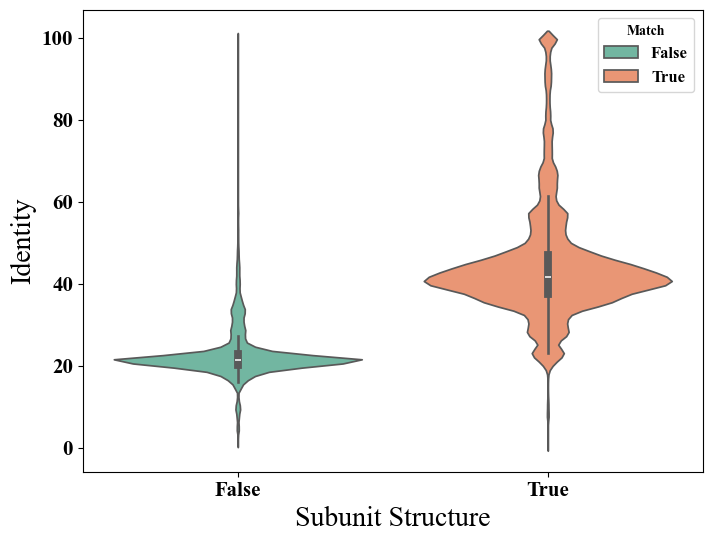

In [7]:
# 设置字体为 Times New Roman
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(8, 6))
sns.violinplot(x='label_match', y='identity', data=result1, hue='label_match', palette='Set2')
# plt.title("Sequence Alignment Identity Scores")
plt.xlabel("Subunit Structure", size = 20)
plt.ylabel("Identity", size = 20)
plt.xticks([0,1],["False","True"], size=15)
plt.yticks(size=15)
plt.legend(title='Match', fontsize=12)
plt.savefig("./DATA/figures/Sequence_Alignment_Identity_Scores", dpi=300,bbox_inches = 'tight')
plt.show()